In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset["train"].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
#Filter jobs in the US and drop NaNs salaries:
df_US = df[df["job_country"]=="United States"].dropna(subset=["salary_year_avg"])

#or to consider lower/upper cases and spaces:
#df_US=(df[df["job_country"].str.strip().str.lower()=="united states"].dropna(subset=["salary_year_avg"]))

In [21]:
#Get the top 6 data jobs into a List:
job_titles = df_US["job_title_short"].value_counts().index[:6].tolist()
#or 
#job_titles=df_US["job_title_short"].value_counts().head(6).index.tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [62]:
df_US["job_title_short"].value_counts()

job_title_short
Data Scientist               4553
Data Analyst                 4350
Data Engineer                2915
Senior Data Scientist        1241
Senior Data Engineer         1058
Senior Data Analyst           913
Business Analyst              431
Software Engineer             157
Machine Learning Engineer     128
Cloud Engineer                 20
Name: count, dtype: int64

In [ ]:
#Filter the dataset with the top 6 data jobs in the list above:
df_US_top6 = df_US[df_US["job_title_short"].isin(job_titles)]
#if the titles are in the list, keep them in the dataframe


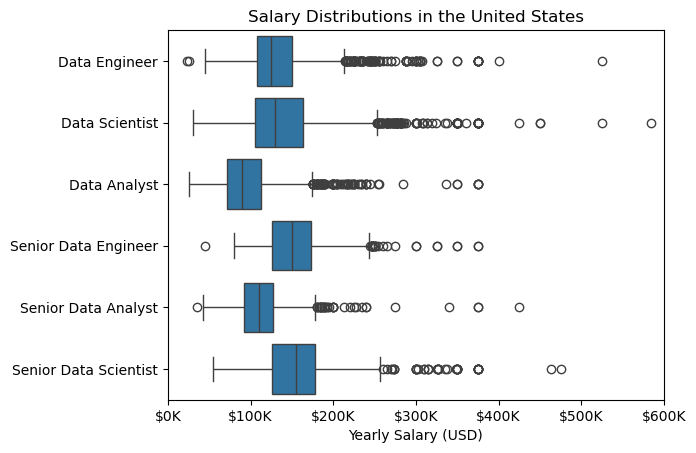

In [29]:
#Plotting:

#this code came from the 20_seaborn lesson:

sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short")

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel("")
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [31]:
#We want to order the y axis (job_titles) in ascending order of the median avg salary
job_order = df_US_top6.groupby("job_title_short")["salary_year_avg"].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

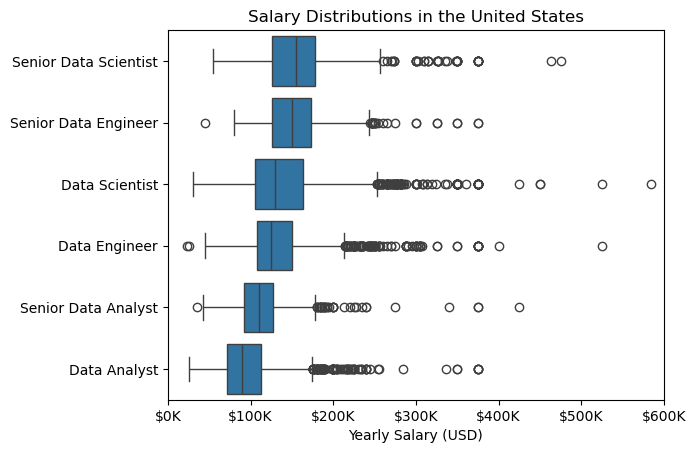

In [33]:
#Seaborn has an order argument that we can use in the plot command:
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order)

plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel("")
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigate Median Salary Vs Skill for Data Analysts:

In [44]:
#Filter the original df to only include DAs in the US:
df_DA_US = df[(df["job_title_short"]=="Data Analyst")&(df["job_country"]=="United States")].copy()


In [45]:
#Drop NaNs for the salary_year_avg column:
df_DA_US=df_DA_US.dropna(subset=["salary_year_avg"])

In [46]:
#Explode the job_skills column:
df_DA_US=df_DA_US.explode("job_skills")

#Lets check:
df_DA_US[["salary_year_avg","job_skills"]].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [61]:
#Find the top paying skills (top skills and top median salary):
df_DA_top_pay=df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="median", ascending=False)
#group by skill and within each skill group focus only on the salary column and count how many
#job posting mention that skill (count) and the median salary for those postings (median)
#then sort from the highest paying to lowest

df_DA_top_pay=df_DA_top_pay.head(10)
#we just want the top 10

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [59]:
#Get a new df with only the most popular SKILLS:
df_DA_top_skills=df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values(by="count", ascending=False)
df_DA_top_skills=df_DA_top_skills.head(10).sort_values(by="median", ascending=False)
df_DA_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


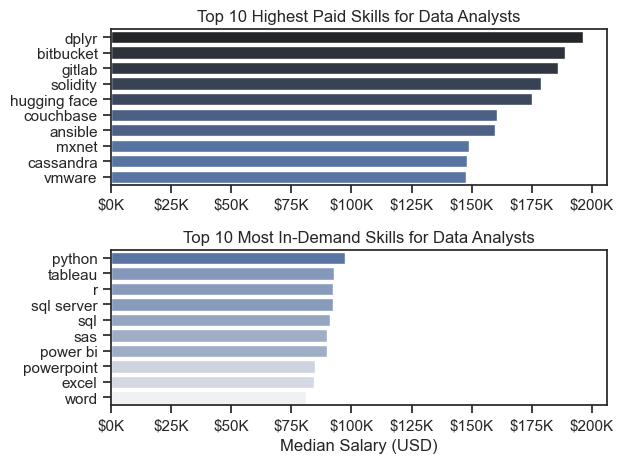

In [60]:
#Plotting using the code from the 20_Seaborn lesson:

fig, ax = plt.subplots(2, 1)  

sns.set_theme(style="ticks")

# Top 10 Highest Paid Skills for Data Analysts
# Matplotlib: df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
# Seaborn:

sns.barplot(data=df_DA_top_pay, x="median", y=df_DA_top_pay.index, ax=ax[0], hue="median", palette="dark:b_r", legend=False)

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
# Matplotlib: df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
# Seaborn:

sns.barplot(data=df_DA_top_skills, x="median", y=df_DA_top_skills.index, ax=ax[1], hue="median", palette="light:b", legend=False)

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()